In [1]:
!pip install matplotlib numpy pandas scikit-learn dask "dask[dataframe]"

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import dask.dataframe as dd
import sklearn as skl
from sklearn.decomposition import PCA

In [3]:
dataset = '../Datasets/Small_datasetPreprocessed2.parquet'

if os.path.exists(dataset):
    df = pd.read_parquet(dataset)
    df = df.dropna() 
    print(df.head(1))
    print(df.shape)
else:
    print("Dataset not found")


   vendorid  passenger_count  trip_distance  ratecodeid  fare_amount  \
0       2.0              1.0           0.52         1.0          4.5   

   total_amount  total_amount_new  pickup_hour  time_in_taxi  tavg  \
0          6.36               5.3            9      3.616667  71.5   

   precipitation  new_snow  snow_depth  day_type  service_zone_pulocation  \
0            0.0       0.0         0.0         1                      3.0   

   service_zone_dolocation  
0                      3.0  
(1110879, 16)


In [4]:
X = df.drop(['fare_amount'], axis=1)
y = df['fare_amount']

In [5]:
#LINEAR REGRESSOR MODEL
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(score)

0.9759298253565873


R^2 score:  0.020120891891030057


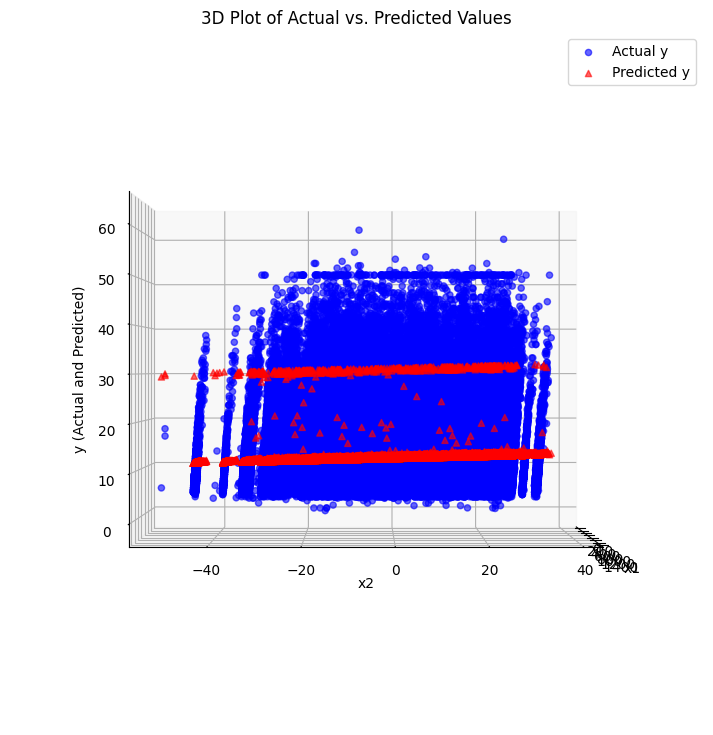

In [6]:
pca = PCA(n_components=2)  # You can specify less if you want to reduce dimensions
# Fit and transform the data
X_pca = pca.fit_transform(X)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

second_linearRegressor = LinearRegression()
second_linearRegressor.fit(X_train_pca, y_train)

y_pred= second_linearRegressor.predict(X_test_pca)

score = second_linearRegressor.score(X_test_pca, y_test)
print("R^2 score: ", score)

x1 = X_test_pca[:, 0]  # First component of X_test_pca
x2 = X_test_pca[:, 1]  # Second component of X_test_pca

# Initialize a 3D plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot actual values
ax.scatter(x1, x2, y_test, c='blue', label='Actual y', alpha=0.6, marker='o')

# Plot predictions
ax.scatter(x1, x2, y_pred, c='red', label='Predicted y', alpha=0.6, marker='^')

# Add labels
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y (Actual and Predicted)')
ax.set_title('3D Plot of Actual vs. Predicted Values')

ax.view_init(elev=0, azim=0)
# Add legend
ax.legend()

# Show plot
plt.show()



In [7]:
#KNN MODEL
knnModel = KNeighborsRegressor(n_neighbors=3)
knnModel.fit(X_train, y_train)

score = knnModel.score(X_test, y_test)
print(score)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
iterations = 5
scores = []
for i in range(iterations):
  knnModel = KNeighborsRegressor(n_neighbors=(5+2*i))
  knnModel.fit(X_train, y_train)

  score = knnModel.score(X_test, y_test)
  scores.append(score)

print(scores)

0.9933891375712811
[0.9935238519774864, 0.9934202894089191, 0.993280271277206, 0.9930713796763397, 0.9928819792758126]


In [8]:
#ELASTICNET MODEL
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train1_scaled = scaler.fit_transform(X_train1)
X_test1_scaled = scaler.transform(X_test1)

scores = []

alpha_values = np.arange(0.5, 1.1, 0.1)  # 0.1 to 1 (inclusive), step of 0.1
l1_ratio_values = np.arange(0.1, 1.1, 0.2)  # 0 to 1 (inclusive), step of 0.1

for alpha in alpha_values:
    for l1_ratio in l1_ratio_values:
        print(f"Alpha: {alpha}, L1 Ratio: {l1_ratio}")
        eNet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42, max_iter=5000, tol=1e-3)
        eNet.fit(X_train1_scaled, y_train1)
        score = eNet.score(X_test1_scaled, y_test1)
        scores.append(score)
        print(f"Score: {score}")

print(scores)

scores_array = np.array(scores)
print(max(scores_array))

scores_array_reshaped = scores_array.reshape(len(alpha_values), len(l1_ratio_values))
print(scores_array_reshaped)    

Alpha: 0.5, L1 Ratio: 0.1
Score: 0.9445328687217206
Alpha: 0.5, L1 Ratio: 0.30000000000000004
Score: 0.9489822178142573
Alpha: 0.5, L1 Ratio: 0.5000000000000001
Score: 0.9532579248634591
Alpha: 0.5, L1 Ratio: 0.7000000000000002
Score: 0.95737918178929
Alpha: 0.5, L1 Ratio: 0.9000000000000001
Score: 0.9632681261673507
Alpha: 0.6, L1 Ratio: 0.1
Score: 0.9372525804522096
Alpha: 0.6, L1 Ratio: 0.30000000000000004
Score: 0.9427383349579296
Alpha: 0.6, L1 Ratio: 0.5000000000000001
Score: 0.9480691039034043
Alpha: 0.6, L1 Ratio: 0.7000000000000002
Score: 0.9531680657861947
Alpha: 0.6, L1 Ratio: 0.9000000000000001
Score: 0.9599917083508773
Alpha: 0.7, L1 Ratio: 0.1
Score: 0.9295461266791052
Alpha: 0.7, L1 Ratio: 0.30000000000000004
Score: 0.9359602273042082
Alpha: 0.7, L1 Ratio: 0.5000000000000001
Score: 0.9423300456049318
Alpha: 0.7, L1 Ratio: 0.7000000000000002
Score: 0.9484789464513648
Alpha: 0.7, L1 Ratio: 0.9000000000000001
Score: 0.9563426406593708
Alpha: 0.7999999999999999, L1 Ratio: 0.

In [9]:
criteria = ['squared_error', 'friedman_mse', 'poisson']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

for criterion in criteria:
  treeRegressor = DecisionTreeRegressor(criterion=criterion, splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, random_state=42,)
  treeRegressor.fit(X_train1, y_train1)
  score = treeRegressor.score(X_test1, y_test1)
  print(f"Criterion: {criterion}, Score: {score}")

Criterion: squared_error, Score: 0.9979271711014575
Criterion: friedman_mse, Score: 0.9979410146384499
Criterion: poisson, Score: 0.9978460733557701
